In [1]:
# Setting up
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive,FloatSlider,IntSlider
import deepdish.io as dd
import numpy as np
%matplotlib inline
def find_closest(A, target):
    #A must be sorted
    idx = A.searchsorted(target)
    idx = np.clip(idx, 1, len(A)-1)
    left = A[idx-1]
    right = A[idx]
    idx -= target - left < right - target
    return idx
path = 'results/Set4/'

In [2]:
# Loading data
chi0 = dd.load('results/Set4/bwh_set4_drought_dy20_dp0_05_chi0_beta1_uniform.hdf5')
chi1 = dd.load('results/Set4/bwh_set4_drought_dy20_dp0_05_chi1_beta1_uniform.hdf5')

In [3]:
# Setups
print(chi1.keys())
print(chi1['l'])
Ps = chi0['Ps_dimensional']
print(Ps)
lattice_length=(chi1['l']/np.sqrt(Ps['M0']/Ps['DB']))[0]
print(lattice_length)
del_to = 0.3
K_min   = (1.0-del_to)
K_max   = (1.0+del_to)
K_to = lambda chi: K_max + chi*(K_min-K_max)
print(K_to(0),K_to(1))
conv_P = 1.0/((Ps['Lambda_max'])/(Ps['M0']**2))
print(conv_P)
Bmax = np.amax((np.amax(np.amax(chi0['b']*K_to(0))),np.amax(np.amax(chi1['b']*K_to(1)))))
print("Bmax=",Bmax)

dict_keys(['Ps_dimensional', 'T', 'b', 'h', 'l', 'n', 'p', 'w', 'beta', 'chi'])
(256.0, 256.0)
{'A': 174.87046632124353, 'DB': 0.1, 'DH': 2.7448888888888887, 'DW': 2.5, 'E': 1.75, 'F': 0.01, 'Gamma': 20.401554404145077, 'K': 0.5, 'Lambda_max': 0.03621503137385534, 'Lambda_min': 0.030179192811546116, 'M0': 2.9145077720207255, 'NH': 6.557642487046633, 'NW': 2.1858808290155443, 'P': 100.0, 'Q': 2.0, 'RH': 0.8, 'RW': 0.3, 'Z': 1000.0, 'del_to': 0.3, 'mu_s_max': 0.3, 'nZ': 300.0, 'npor': 0.3, 's_fc': 0.5333333333333333, 's_fos': 0.175, 's_wp': 0.085, 'seasonality': 0.0}
47.41954215065533
1.3 0.7
234.5533120068351
Bmax= 0.5354310161799841


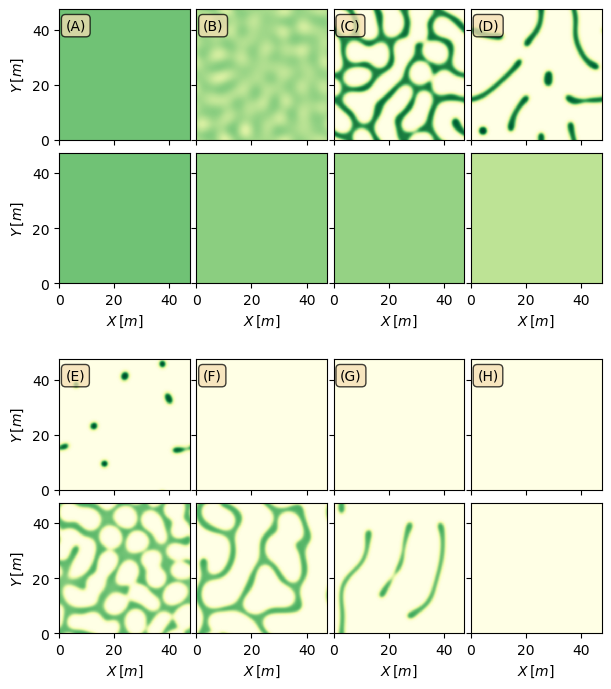

In [12]:
# Plotting
fig=plt.figure(figsize = (7,7),dpi=100, constrained_layout=False)
gs1 = fig.add_gridspec(nrows=2, ncols=4,wspace=0.05,hspace=0.05,top=0.95,bottom=0.55)
gs2 = fig.add_gridspec(nrows=2, ncols=4,wspace=0.05,hspace=0.05,top=0.45,bottom=0.05)
#gs2 = fig.add_gridspec(nrows=2, ncols=4, left=0.05, right=0.48,top=0.475,bottom=0.05,
#                        wspace=0.1,hspace=0.001)
ax11 = fig.add_subplot(gs1[0,0])
ax12 = fig.add_subplot(gs1[0,1],sharey=ax11,sharex=ax11)
ax13 = fig.add_subplot(gs1[0,2],sharey=ax11,sharex=ax11)
ax14 = fig.add_subplot(gs1[0,3],sharey=ax11,sharex=ax11)
ax15 = fig.add_subplot(gs1[1,0],sharey=ax11,sharex=ax11)
ax16 = fig.add_subplot(gs1[1,1],sharey=ax11,sharex=ax11)
ax17 = fig.add_subplot(gs1[1,2],sharey=ax11,sharex=ax11)
ax18 = fig.add_subplot(gs1[1,3],sharey=ax11,sharex=ax11)
ax21 = fig.add_subplot(gs2[0,0])
ax22 = fig.add_subplot(gs2[0,1],sharey=ax21,sharex=ax21)
ax23 = fig.add_subplot(gs2[0,2],sharey=ax21,sharex=ax21)
ax24 = fig.add_subplot(gs2[0,3],sharey=ax21,sharex=ax21)
ax25 = fig.add_subplot(gs2[1,0],sharey=ax21,sharex=ax21)
ax26 = fig.add_subplot(gs2[1,1],sharey=ax21,sharex=ax21)
ax27 = fig.add_subplot(gs2[1,2],sharey=ax21,sharex=ax21)
ax28 = fig.add_subplot(gs2[1,3],sharey=ax21,sharex=ax21)
plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax12.get_xticklabels(), visible=False)
plt.setp(ax13.get_xticklabels(), visible=False)
plt.setp(ax14.get_xticklabels(), visible=False)
plt.setp(ax12.get_yticklabels(), visible=False)
plt.setp(ax13.get_yticklabels(), visible=False)
plt.setp(ax14.get_yticklabels(), visible=False)
plt.setp(ax16.get_yticklabels(), visible=False)
plt.setp(ax17.get_yticklabels(), visible=False)
plt.setp(ax18.get_yticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)
plt.setp(ax22.get_xticklabels(), visible=False)
plt.setp(ax23.get_xticklabels(), visible=False)
plt.setp(ax24.get_xticklabels(), visible=False)
plt.setp(ax22.get_yticklabels(), visible=False)
plt.setp(ax23.get_yticklabels(), visible=False)
plt.setp(ax24.get_yticklabels(), visible=False)
plt.setp(ax26.get_yticklabels(), visible=False)
plt.setp(ax27.get_yticklabels(), visible=False)
plt.setp(ax28.get_yticklabels(), visible=False)
im1=ax11.imshow(chi0['b'][0]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
                cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax15.imshow(chi1['b'][0]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax12.imshow(chi0['b'][6]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax16.imshow(chi1['b'][6]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax13.imshow(chi0['b'][8]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax17.imshow(chi1['b'][8]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax14.imshow(chi0['b'][15]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax18.imshow(chi1['b'][15]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
im2=ax21.imshow(chi0['b'][18]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
                cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax25.imshow(chi1['b'][18]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax22.imshow(chi0['b'][21]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax26.imshow(chi1['b'][21]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax23.imshow(chi0['b'][26]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax27.imshow(chi1['b'][26]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax24.imshow(chi0['b'][31]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax28.imshow(chi1['b'][31]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax11.set_ylabel(r'$Y\,[m]$')
ax15.set_ylabel(r'$Y\,[m]$')
ax21.set_ylabel(r'$Y\,[m]$')
ax25.set_ylabel(r'$Y\,[m]$')
ax15.set_xlabel(r'$X\,[m]$')
ax16.set_xlabel(r'$X\,[m]$')
ax17.set_xlabel(r'$X\,[m]$')
ax18.set_xlabel(r'$X\,[m]$')
ax25.set_xlabel(r'$X\,[m]$')
ax26.set_xlabel(r'$X\,[m]$')
ax27.set_xlabel(r'$X\,[m]$')
ax28.set_xlabel(r'$X\,[m]$')
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax11.text(0.05, 0.875,r'(A)', ha='left', va='center', transform=ax11.transAxes, bbox=props)
ax12.text(0.05, 0.875,r'(B)', ha='left', va='center', transform=ax12.transAxes, bbox=props)
ax13.text(0.05, 0.875,r'(C)', ha='left', va='center', transform=ax13.transAxes, bbox=props)
ax14.text(0.05, 0.875,r'(D)', ha='left', va='center', transform=ax14.transAxes, bbox=props)
ax21.text(0.05, 0.875,r'(E)', ha='left', va='center', transform=ax21.transAxes, bbox=props)
ax22.text(0.05, 0.875,r'(F)', ha='left', va='center', transform=ax22.transAxes, bbox=props)
ax23.text(0.05, 0.875,r'(G)', ha='left', va='center', transform=ax23.transAxes, bbox=props)
ax24.text(0.05, 0.875,r'(H)', ha='left', va='center', transform=ax24.transAxes, bbox=props)
plt.savefig('bwh_drought_matrix.pdf')
plt.savefig('bwh_drought_matrix.png')

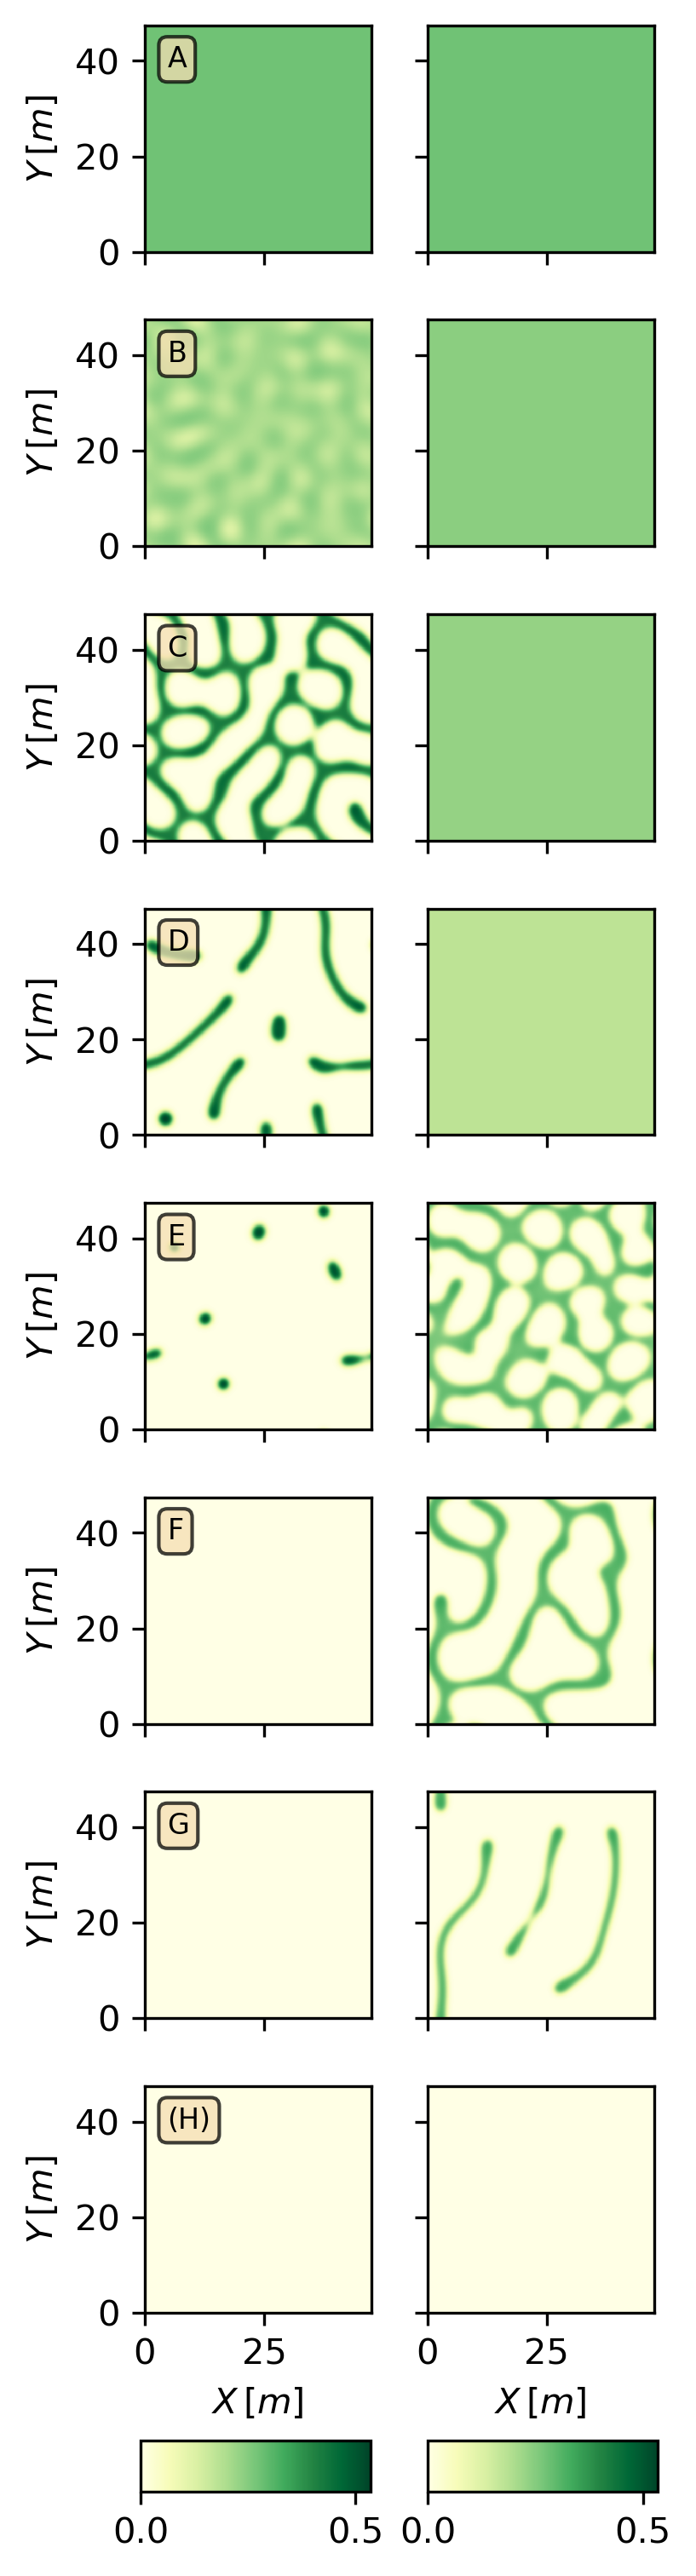

In [24]:
# Plotting
fig=plt.figure(figsize = (2.7,10),dpi=300, constrained_layout=False)
gs1 = fig.add_gridspec(nrows=8, ncols=2, left=0.175, right=0.975,
                       wspace=0.05,hspace=0.3,top= 0.995, bottom=0.1)
gs2 = fig.add_gridspec(nrows=1, ncols=2, left=0.2, right=0.95,
                       wspace=0.25,hspace=0.3,top= 0.05, bottom=0.03)
ax11 = fig.add_subplot(gs1[0,0])
ax12 = fig.add_subplot(gs1[1,0],sharey=ax11,sharex=ax11)
ax13 = fig.add_subplot(gs1[2,0],sharey=ax11,sharex=ax11)
ax14 = fig.add_subplot(gs1[3,0],sharey=ax11,sharex=ax11)
ax15 = fig.add_subplot(gs1[0,1],sharey=ax11,sharex=ax11)
ax16 = fig.add_subplot(gs1[1,1],sharey=ax11,sharex=ax11)
ax17 = fig.add_subplot(gs1[2,1],sharey=ax11,sharex=ax11)
ax18 = fig.add_subplot(gs1[3,1],sharey=ax11,sharex=ax11)
ax21 = fig.add_subplot(gs1[4,0])
ax22 = fig.add_subplot(gs1[5,0],sharey=ax11,sharex=ax11)
ax23 = fig.add_subplot(gs1[6,0],sharey=ax11,sharex=ax11)
ax24 = fig.add_subplot(gs1[7,0],sharey=ax11,sharex=ax11)
ax25 = fig.add_subplot(gs1[4,1],sharey=ax11,sharex=ax11)
ax26 = fig.add_subplot(gs1[5,1],sharey=ax11,sharex=ax11)
ax27 = fig.add_subplot(gs1[6,1],sharey=ax11,sharex=ax11)
ax28 = fig.add_subplot(gs1[7,1],sharey=ax11,sharex=ax11)

plt.setp(ax11.get_xticklabels(), visible=False)
plt.setp(ax12.get_xticklabels(), visible=False)
plt.setp(ax13.get_xticklabels(), visible=False)
plt.setp(ax14.get_xticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)
plt.setp(ax16.get_xticklabels(), visible=False)
plt.setp(ax17.get_xticklabels(), visible=False)
plt.setp(ax18.get_xticklabels(), visible=False)
plt.setp(ax21.get_xticklabels(), visible=False)
plt.setp(ax22.get_xticklabels(), visible=False)
plt.setp(ax23.get_xticklabels(), visible=False)
#plt.setp(ax24.get_xticklabels(), visible=False)
plt.setp(ax25.get_xticklabels(), visible=False)
plt.setp(ax26.get_xticklabels(), visible=False)
plt.setp(ax27.get_xticklabels(), visible=False)
#plt.setp(ax28.get_xticklabels(), visible=False)
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax16.get_yticklabels(), visible=False)
plt.setp(ax17.get_yticklabels(), visible=False)
plt.setp(ax18.get_yticklabels(), visible=False)
plt.setp(ax25.get_yticklabels(), visible=False)
plt.setp(ax26.get_yticklabels(), visible=False)
plt.setp(ax27.get_yticklabels(), visible=False)
plt.setp(ax28.get_yticklabels(), visible=False)
im1=ax11.imshow(chi0['b'][0]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
                cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
im2=ax15.imshow(chi1['b'][0]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
                cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax12.imshow(chi0['b'][6]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax16.imshow(chi1['b'][6]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax13.imshow(chi0['b'][8]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax17.imshow(chi1['b'][8]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax14.imshow(chi0['b'][15]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax18.imshow(chi1['b'][15]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax21.imshow(chi0['b'][18]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax25.imshow(chi1['b'][18]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax22.imshow(chi0['b'][21]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax26.imshow(chi1['b'][21]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax23.imshow(chi0['b'][26]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax27.imshow(chi1['b'][26]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax24.imshow(chi0['b'][31]*K_to(0),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
ax28.imshow(chi1['b'][31]*K_to(1),extent=(0,lattice_length,0,lattice_length),aspect=1,
            cmap=plt.cm.YlGn,vmax=Bmax,vmin=0.0)
axcbar1 = fig.add_subplot(gs2[0, 0])
axcbar2 = fig.add_subplot(gs2[0, 1])
#cbar1 = fig.colorbar(im1, orientation='horizontal',cax=axcbar1)
#cbar2 = fig.colorbar(im2, orientation='horizontal',cax=axcbar2)
cbar1 = fig.colorbar(im1, orientation='horizontal',cax=axcbar1) #ticks=np.round(np.linspace(0,K1,3),2)
cbar2 = fig.colorbar(im2, orientation='horizontal',cax=axcbar2) #ticks=np.round(np.linspace(0,K2,3),2)
ax11.set_ylabel(r'$Y\,[m]$')
ax12.set_ylabel(r'$Y\,[m]$')
ax13.set_ylabel(r'$Y\,[m]$')
ax14.set_ylabel(r'$Y\,[m]$')
ax21.set_ylabel(r'$Y\,[m]$')
ax22.set_ylabel(r'$Y\,[m]$')
ax23.set_ylabel(r'$Y\,[m]$')
ax24.set_ylabel(r'$Y\,[m]$')
ax24.set_xlabel(r'$X\,[m]$')
ax28.set_xlabel(r'$X\,[m]$')
fontsize=8
props = dict(boxstyle='round', facecolor='wheat', alpha=0.75)
ax11.text(0.1, 0.85,r'A', ha='left', va='center', transform=ax11.transAxes, bbox=props,fontsize=fontsize)
ax12.text(0.1, 0.85,r'B', ha='left', va='center', transform=ax12.transAxes, bbox=props,fontsize=fontsize)
ax13.text(0.1, 0.85,r'C', ha='left', va='center', transform=ax13.transAxes, bbox=props,fontsize=fontsize)
ax14.text(0.1, 0.85,r'D', ha='left', va='center', transform=ax14.transAxes, bbox=props,fontsize=fontsize)
ax21.text(0.1, 0.85,r'E', ha='left', va='center', transform=ax21.transAxes, bbox=props,fontsize=fontsize)
ax22.text(0.1, 0.85,r'F', ha='left', va='center', transform=ax22.transAxes, bbox=props,fontsize=fontsize)
ax23.text(0.1, 0.85,r'G', ha='left', va='center', transform=ax23.transAxes, bbox=props,fontsize=fontsize)
ax24.text(0.1, 0.85,r'(H)', ha='left', va='center', transform=ax24.transAxes, bbox=props,fontsize=fontsize)

plt.savefig('bwh_drought_matrix.pdf')
plt.savefig('bwh_drought_matrix.png')